# GOOGLE Data Analysis

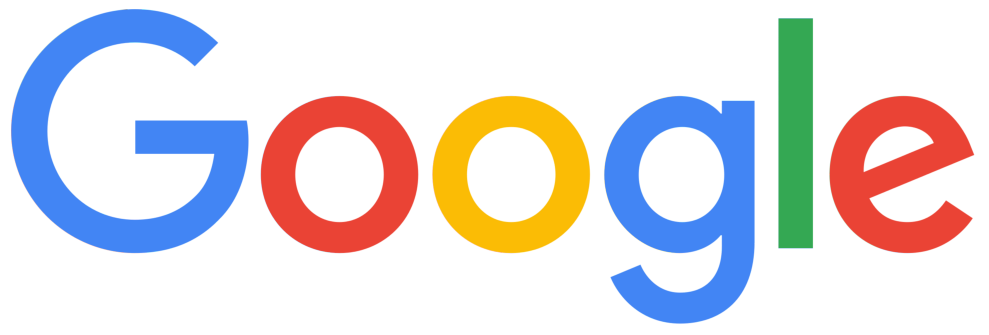

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pytrends.request import TrendReq
from PIL import Image

fname = r"google-logo-png-google-sva-scholarship-20.png"
image = Image.open(fname)

plt.figure(figsize=(10,6))    
plt.imshow(image)            
plt.axis("off")              
plt.tight_layout()
plt.show()


#### Setup Pytrend Library and Keyword Define

In [2]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "Cloud Computing"

#### Data Request

In [3]:
pytrends.build_payload([keyword], cat = 0, timeframe = "today 12-m", geo = '', gprop = '')

<!-- Country Wise Intererst  -->

In [4]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword , ascending = False).head(15)

## Top Countries

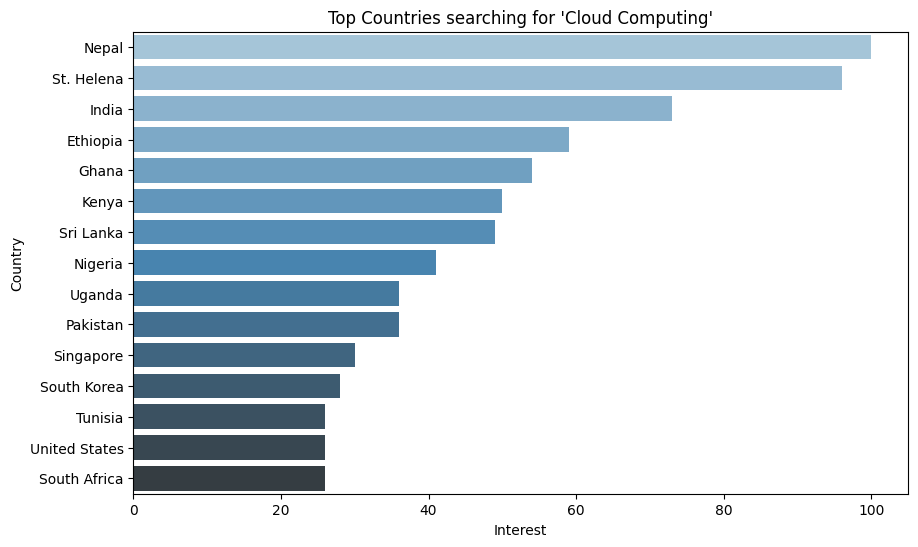

In [5]:
plt.figure(figsize=(10,6))

sns.barplot(
    x = region_data[keyword],
    y = region_data.index,
    hue = region_data.index,        # ← added
    palette = 'Blues_d',
    legend=False                    # ← added
)

plt.title(f"Top Countries searching for '{keyword}'")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()


## World Map

C:\Users\shiva\AppData\Local\Temp\ipykernel_30960\3160378965.py:2: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(region_data,


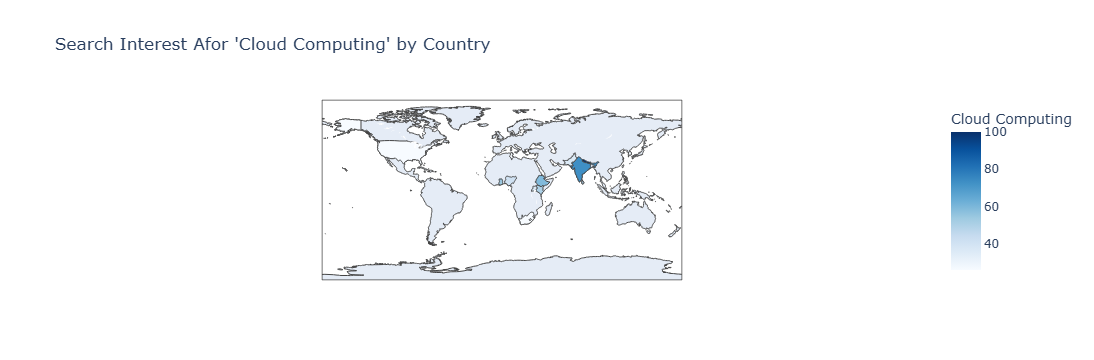

In [6]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
locations = 'geoName',
locationmode = 'country names',
color = keyword,
title = f"Search Interest Afor '{keyword}' by Country",
color_continuous_scale = 'blues')

fig.show()

## Time Wise Interest

In [12]:
pd.set_option('future.no_silent_downcasting', True)
time_df = pytrends.interest_over_time()

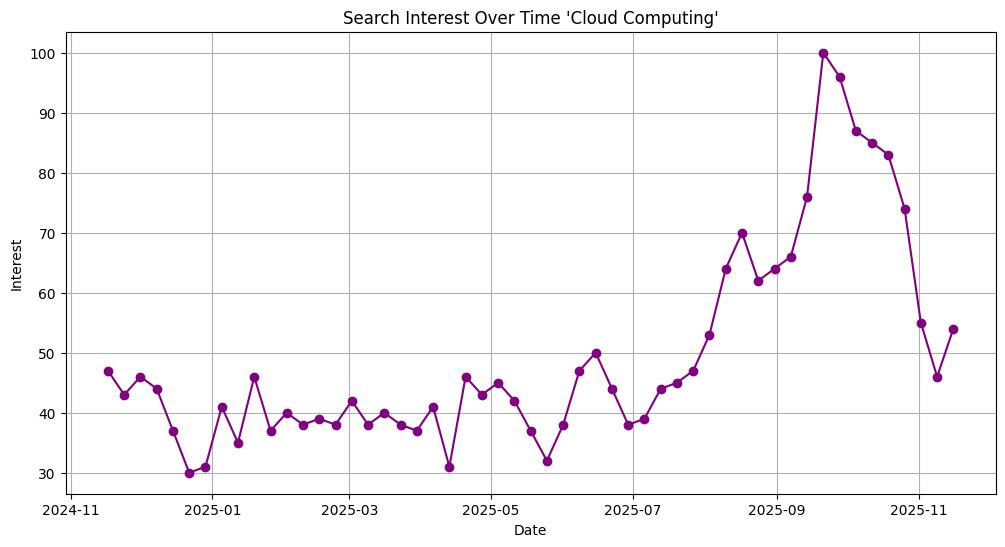

In [8]:
plt.figure(figsize = (12,6))
plt.plot(time_df.index , time_df[keyword],marker = 'o',color ='purple')
plt.title(f"Search Interest Over Time '{keyword}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

## Multiple keyword compare

In [9]:
kw_list =["Cloud Computing" , "Data Science" , "Machine Learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe = "today 12-m", geo = '', gprop = '')

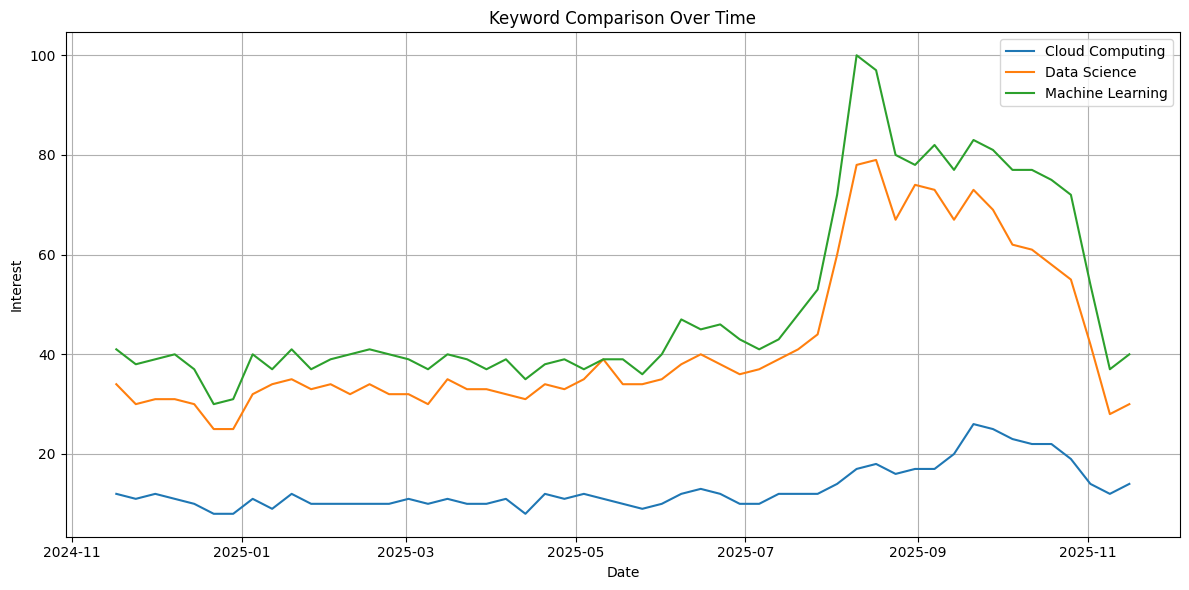

In [13]:
compare_df = pytrends.interest_over_time()

plt.figure(figsize = (12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()